In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Reads in the data from the csv file
df1103 = pd.read_csv('df_1103.csv')
df1201 = pd.read_csv('df_1201.csv')
df1103['datetime'] = pd.to_datetime(df1103['datetime'])
df1201['datetime'] = pd.to_datetime(df1201['datetime'])
df1103.drop(columns=['Unnamed: 0'], inplace=True)
df1201.drop(columns=['Unnamed: 0'], inplace=True)
df1103.set_index('datetime', inplace=True)
df1201.set_index('datetime', inplace=True)

In [ ]:
df1103.head()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
datetime,,,,,,,,
2015-01-01 08:00:00,1103,32.9,1.1620,0.5,49.0,41.2,0.007,46.0
2015-01-01 09:00:00,1103,32.2,1.2735,0.0,55.0,39.9,0.007,59.0
2015-01-01 10:00:00,1103,30.7,0.8810,0.3,56.0,39.1,0.006,66.0
2015-01-01 11:00:00,1103,31.5,0.4940,0.0,47.0,38.0,0.008,54.0
2015-01-01 12:00:00,1103,30.6,0.3105,0.1,40.0,38.1,0.006,50.0


In [ ]:
df1103.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65711.000000,1103.0,18.922900,0.428865,0.137238,55.775931,65.802707,0.024876,15.203386
std,37939.129563,0.0,12.180621,0.316351,0.278709,26.521060,9.259292,0.018636,10.879135
min,0.000000,1103.0,0.200000,-0.400000,-0.600000,1.000000,37.700000,0.000000,-6.000000
25%,32855.500000,1103.0,8.800000,0.200000,0.000000,32.000000,59.600000,0.007000,9.000000
50%,65711.000000,1103.0,16.000000,0.300000,0.000000,59.000000,66.800000,0.024000,13.000000
75%,98566.500000,1103.0,27.262500,0.511000,0.200000,80.000000,70.500000,0.038000,19.000000
max,131422.000000,1103.0,80.600000,3.400000,13.400000,100.000000,110.600000,0.185000,541.000000


In [ ]:
df1201.describe()

,Unnamed: 0,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.000000,65712.0,65712.000000,65712.000000,65712.000000,52332.000000,65712.000000,65712.000000,65712.000000
mean,65712.000000,1201.0,11.950138,0.426555,0.148405,55.779313,66.078211,0.033669,14.602232
std,37939.129563,0.0,9.604563,0.314977,0.290082,26.537391,10.755264,0.021195,10.656137
min,1.000000,1201.0,-4.800000,-0.300000,-0.500000,1.000000,33.800000,-0.001000,-3.700000
25%,32856.500000,1201.0,4.600000,0.200000,0.000000,32.000000,59.200000,0.017000,8.400000
50%,65712.000000,1201.0,8.500000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,98567.500000,1201.0,17.500000,0.506000,0.200000,80.000000,71.500000,0.046000,19.000000
max,131423.000000,1201.0,72.500000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000


In [ ]:
def fill_missing_rh(df):
    df = df.copy()

    for idx in df[df['RH_Measurement'].isna()].index:
        values = []

        for year_offset in [1, 2]:
            for direction in [-2,-1, 1]:  # Looking at past and future years
                lookup_idx = idx + pd.DateOffset(years=year_offset * direction)
                if lookup_idx in df.index and pd.notna(df.at[lookup_idx, 'RH_Measurement']):
                    values.append(df.at[lookup_idx, 'RH_Measurement'])

        if values:  # If we found any valid values, take the average
            df.at[idx, 'RH_Measurement'] = sum(values) / len(values)
    return df

df1103 = fill_missing_rh(df1103)
df1201 = fill_missing_rh(df1201)



In [ ]:
df1103.isna().sum()

,0
AQS_Code,0
NO2_Measurement,0
CO_Measurement,0
SO2_Measurement,0
RH_Measurement,0
Temp_Measurement,0
ozone_Measurement,0
PM_Measurement,0


# Removing the Negative Values

In [ ]:
# Function to replace negative values with 0
def replace_negative_values(data):
    for column in data.columns:
        if column != 'datetime':
            data[column] = data[column].apply(lambda x: 0 if x < 0 else x)
    return data


In [ ]:
df1103 = replace_negative_values(df1103)
df1201 = replace_negative_values(df1201)

In [ ]:
df1103.describe()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,1103.0,18.922900,0.430660,0.141578,56.359639,65.802707,0.024876,15.208219
std,0.0,12.180621,0.313441,0.274194,24.709227,9.259292,0.018636,10.871812
min,1103.0,0.200000,0.000000,0.000000,1.000000,37.700000,0.000000,0.000000
25%,1103.0,8.800000,0.200000,0.000000,37.000000,59.600000,0.007000,9.000000
50%,1103.0,16.000000,0.300000,0.000000,59.000000,66.800000,0.024000,13.000000
75%,1103.0,27.262500,0.511000,0.200000,77.333333,70.500000,0.038000,19.000000
max,1103.0,80.600000,3.400000,13.400000,100.000000,110.600000,0.185000,541.000000


In [ ]:
df1201.describe()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.0,65712.00000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,1201.0,11.95104,0.428380,0.150854,56.362545,66.078211,0.033669,14.610299
std,0.0,9.60330,0.312016,0.288035,24.725470,10.755264,0.021195,10.644348
min,1201.0,0.00000,0.000000,0.000000,1.000000,33.800000,0.000000,0.000000
25%,1201.0,4.60000,0.200000,0.000000,37.000000,59.200000,0.017000,8.400000
50%,1201.0,8.50000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,1201.0,17.50000,0.506000,0.200000,77.166667,71.500000,0.046000,19.000000
max,1201.0,72.50000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000


# Removing Outliers

In [ ]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]

    return lower_bound, upper_bound, num_outliers, outliers


def outlier_processing(data, column_name):
    # Make a copy of the DataFrame to avoid modifying the original
    data_copy = data.copy()

    # Convert index to DatetimeIndex if it's not already
    if not isinstance(data_copy.index, pd.DatetimeIndex):
        try:
            data_copy.index = pd.to_datetime(data_copy.index)
        except ValueError:
            raise ValueError("Index cannot be converted to DatetimeIndex")

    # Detect outliers using IQR method
    lower_bound, upper_bound, num_outliers, outliers = detect_outliers_iqr(data_copy, column_name)

    # Iterate through each outlier
    for idx in outliers.index:
        current_index = idx
        # Check next hour data
        next_index = current_index + pd.Timedelta(hours=1)
        prev_year_index = current_index - pd.DateOffset(years=1)
        next_year_index = current_index + pd.DateOffset(years=1)
        similar_time = data_copy[(data_copy.index.month == next_year_index.month) & (data_copy.index.day == next_year_index.day) & (data_copy.index.hour == next_year_index.hour)]
        #check next hour data
        if next_index in data_copy.index and data_copy.at[next_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[next_index, column_name]
        # Check previous hour data
        elif prev_year_index in data_copy.index and data_copy.at[prev_year_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[prev_year_index, column_name]
        # Check data from the same time in the previous year
        elif prev_year_index in data_copy.index and data_copy.at[prev_year_index, column_name] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = data_copy.at[prev_year_index, column_name]
        # Check data from a similar time in the next year
        elif not similar_time.empty and similar_time[column_name].values[0] not in outliers[column_name].values:
            data_copy.at[current_index, column_name] = similar_time[column_name].values[0]
        else:
            # If no similar time is found, replace the outlier with the lower or upper bound
            if data_copy.at[current_index, column_name] > upper_bound:
                data_copy.at[current_index, column_name] = upper_bound
            elif data_copy.at[current_index, column_name] < lower_bound:
                data_copy.at[current_index, column_name] = lower_bound

    # Check if the number of outliers is as expected
    print(f'Number of outliers for {column_name} are {num_outliers}')

    return data_copy


In [ ]:
def cleaner(data):
    for col in data.columns:
        if col!='datetime' and col!='PM_Measurement' and col!='AQS_Code' and col!='Unnamed: 0':
            print(col)
            data=outlier_processing(data, col)
    return data

In [ ]:
df1103_clean=cleaner(df1103)

NO2_Measurement
Number of outliers for NO2_Measurement are 294
CO_Measurement
Number of outliers for CO_Measurement are 4917
SO2_Measurement
Number of outliers for SO2_Measurement are 5595
RH_Measurement
Number of outliers for RH_Measurement are 0
Temp_Measurement
Number of outliers for Temp_Measurement are 1651
ozone_Measurement
Number of outliers for ozone_Measurement are 177


In [ ]:
df1103['PM_Measurement'].describe()

,PM_Measurement
count,65712.000000
mean,15.208219
std,10.871812
min,0.000000
25%,9.000000
50%,13.000000
75%,19.000000
max,541.000000


In [ ]:
df1103_clean.describe()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,1103.0,18.837890,0.382745,0.083846,56.359639,65.600581,0.024794,15.208219
std,0.0,11.989855,0.219330,0.148539,24.709227,8.743818,0.018398,10.871812
min,1103.0,0.200000,0.000000,0.000000,1.000000,43.250000,0.000000,0.000000
25%,1103.0,8.800000,0.200000,0.000000,37.000000,59.600000,0.007000,9.000000
50%,1103.0,16.000000,0.300000,0.000000,59.000000,66.750000,0.024000,13.000000
75%,1103.0,27.200000,0.500000,0.100000,77.333333,70.500000,0.038000,19.000000
max,1103.0,54.956250,0.977500,0.500000,100.000000,86.850000,0.084500,541.000000


In [ ]:
df1201_clean=cleaner(df1201)

NO2_Measurement
Number of outliers for NO2_Measurement are 1257
CO_Measurement
Number of outliers for CO_Measurement are 4881
SO2_Measurement
Number of outliers for SO2_Measurement are 5375
RH_Measurement
Number of outliers for RH_Measurement are 0
Temp_Measurement
Number of outliers for Temp_Measurement are 2078
ozone_Measurement
Number of outliers for ozone_Measurement are 791


In [ ]:
df1201.describe()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.0,65712.00000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,1201.0,11.95104,0.428380,0.150854,56.362545,66.078211,0.033669,14.610299
std,0.0,9.60330,0.312016,0.288035,24.725470,10.755264,0.021195,10.644348
min,1201.0,0.00000,0.000000,0.000000,1.000000,33.800000,0.000000,0.000000
25%,1201.0,4.60000,0.200000,0.000000,37.000000,59.200000,0.017000,8.400000
50%,1201.0,8.50000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,1201.0,17.50000,0.506000,0.200000,77.166667,71.500000,0.046000,19.000000
max,1201.0,72.50000,2.900000,17.900000,100.000000,117.500000,0.142000,995.600000


In [ ]:
df1201_clean.describe()

,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
count,65712.0,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000,65712.000000
mean,1201.0,11.628634,0.381334,0.094359,56.362545,65.789902,0.033175,14.610299
std,0.0,8.974584,0.218353,0.154478,24.725470,9.960948,0.020177,10.644348
min,1201.0,0.000000,0.000000,0.000000,1.000000,40.750000,0.000000,0.000000
25%,1201.0,4.600000,0.200000,0.000000,37.000000,59.200000,0.017000,8.400000
50%,1201.0,8.500000,0.300000,0.000000,59.000000,67.000000,0.034000,12.900000
75%,1201.0,17.200000,0.500000,0.200000,77.166667,71.400000,0.046000,19.000000
max,1201.0,36.850000,0.965000,0.500000,100.000000,89.950000,0.089500,995.600000


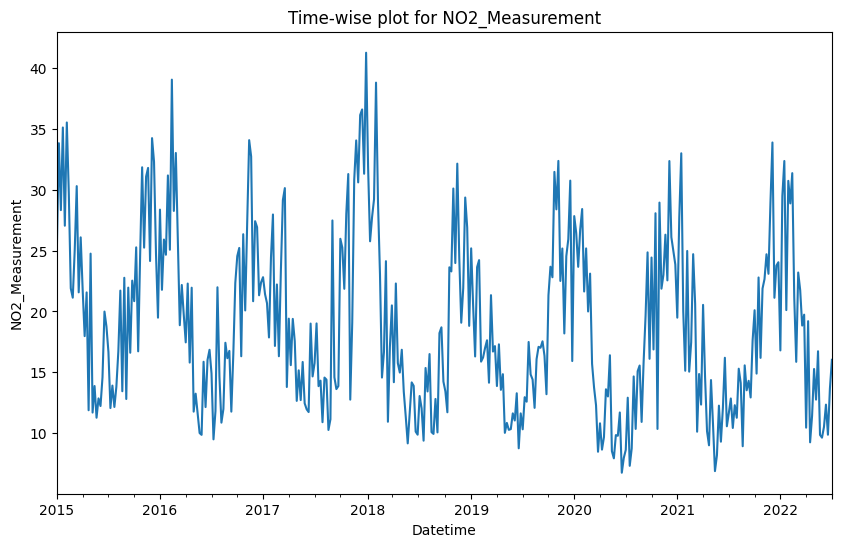

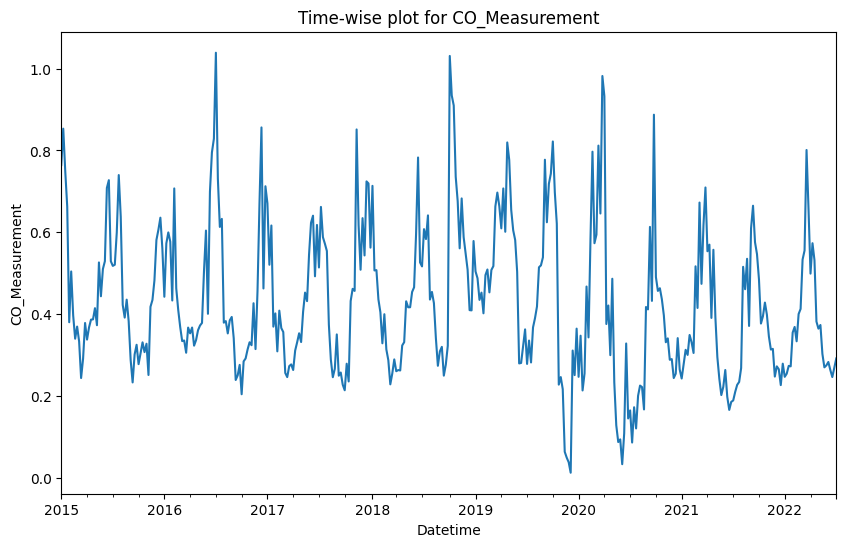

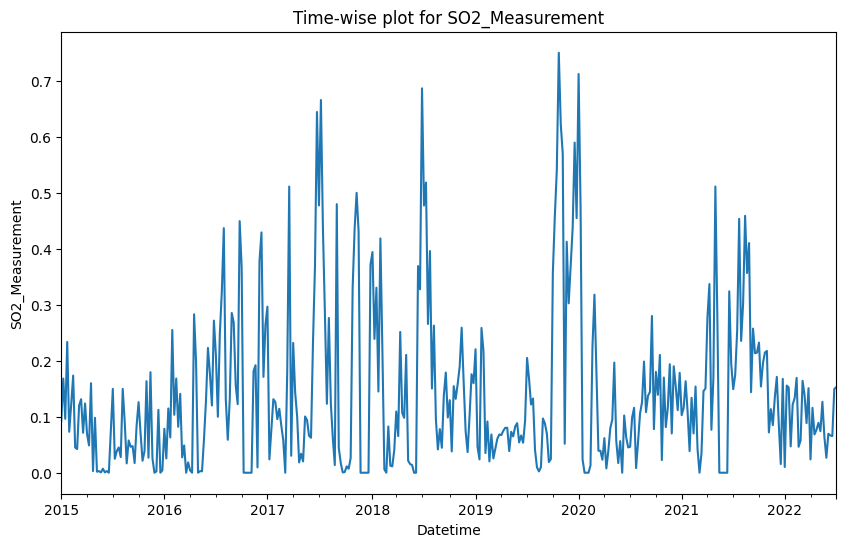

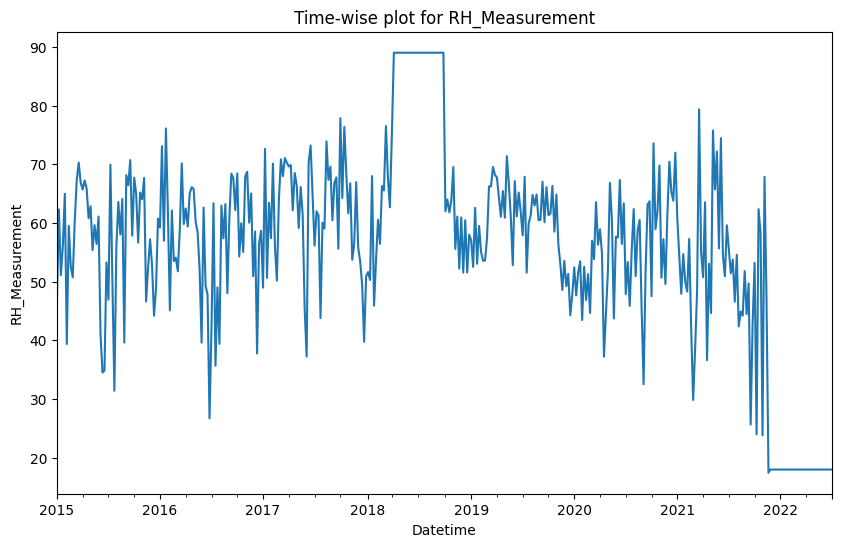

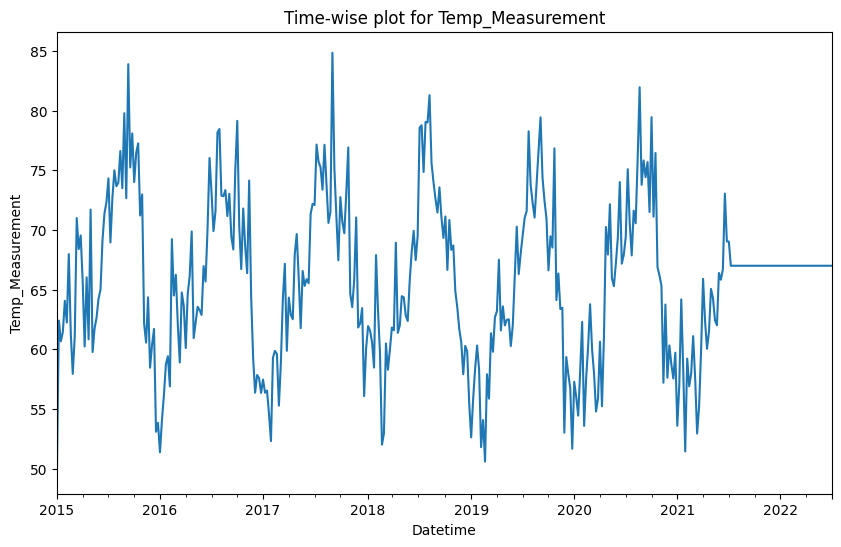

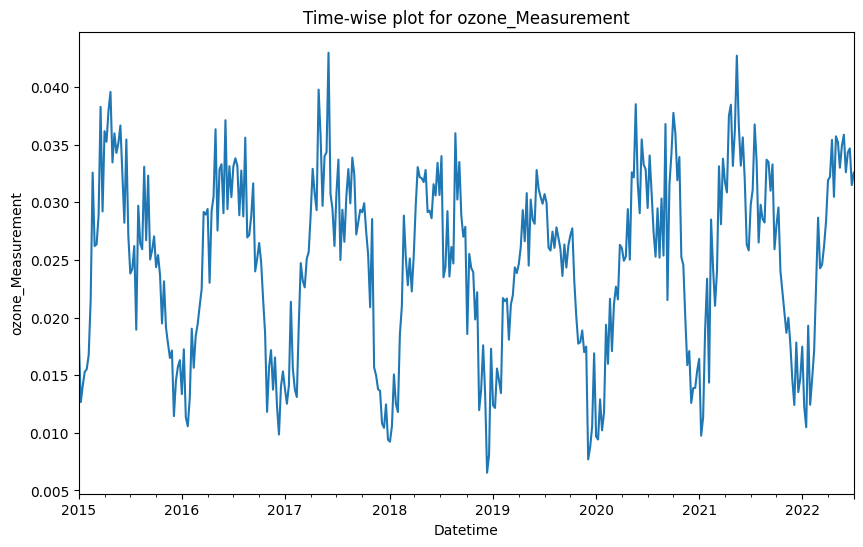

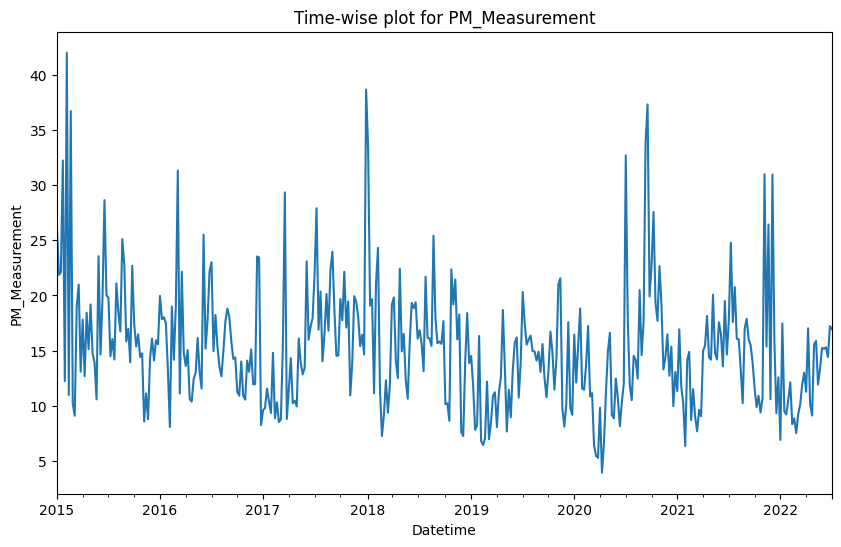

In [ ]:
import matplotlib.pyplot as plt
weekly_df1103 = df1103.resample('W').mean()
weekly_df1201 = df1201.resample('W').mean()

for column in weekly_df1103.columns:
    if column != 'AQS_Code':
        plt.figure(figsize=(10, 6))
        weekly_df1103[column].plot(title=f'Time-wise plot for {column}',linestyle='-')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.show()

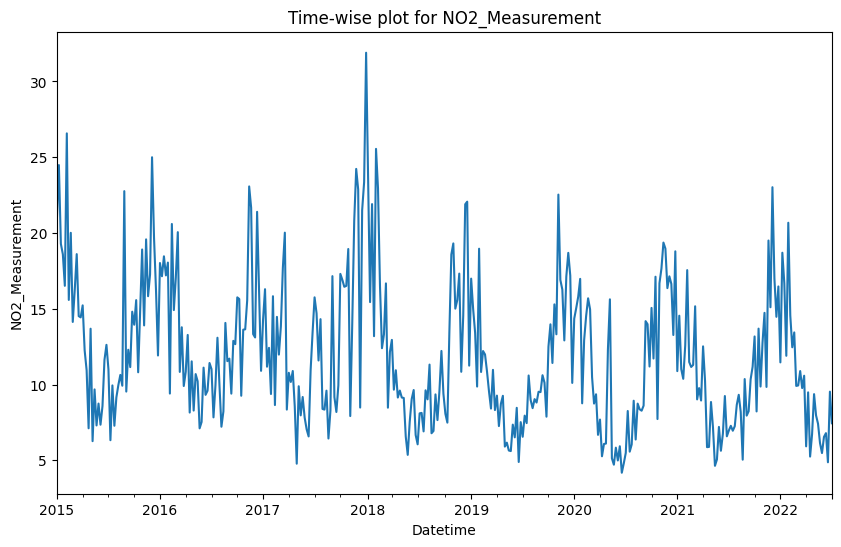

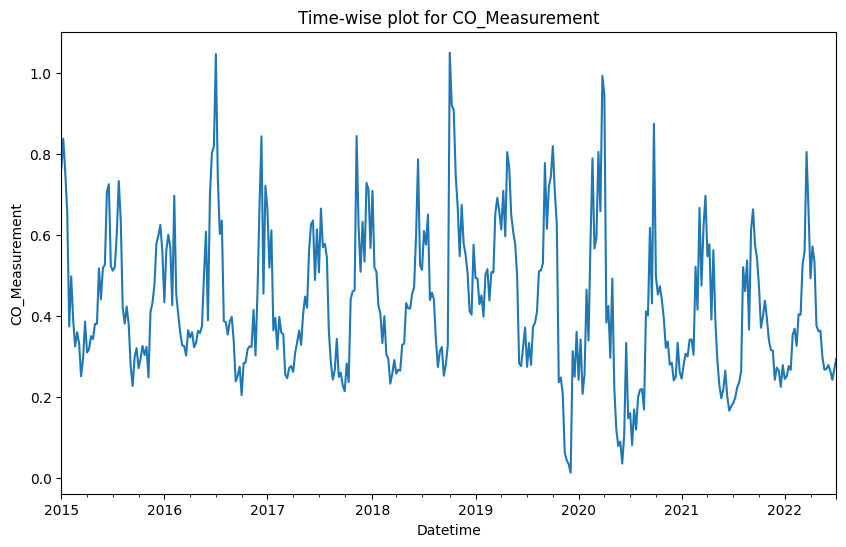

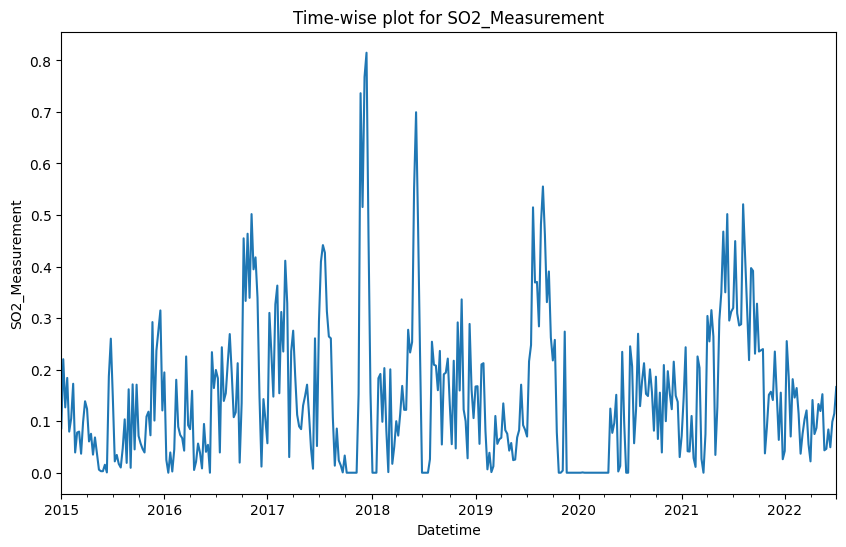

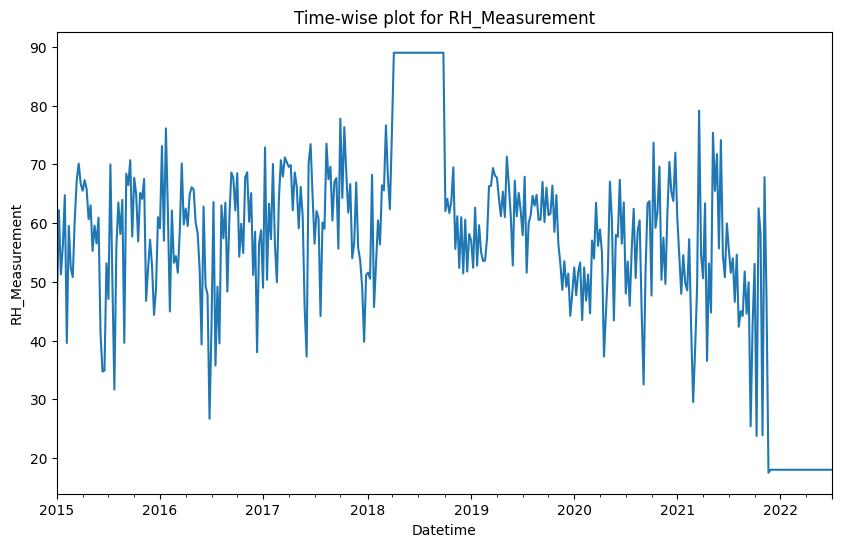

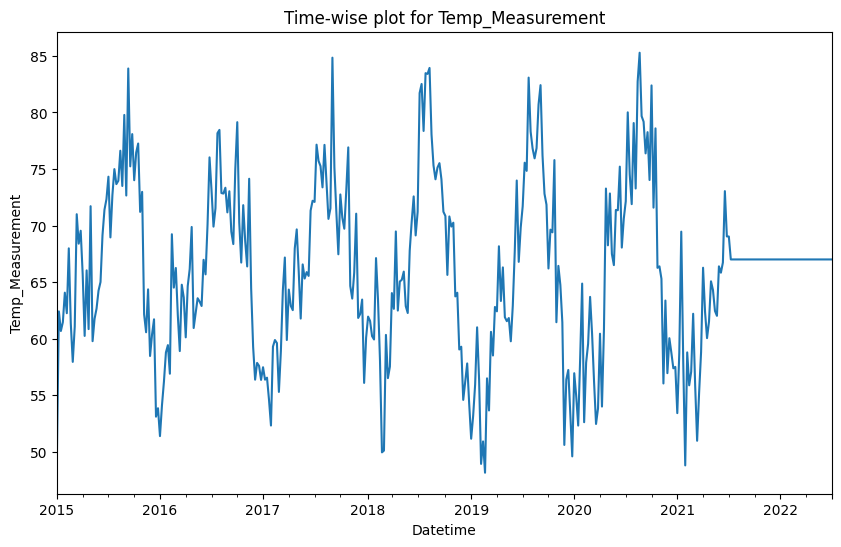

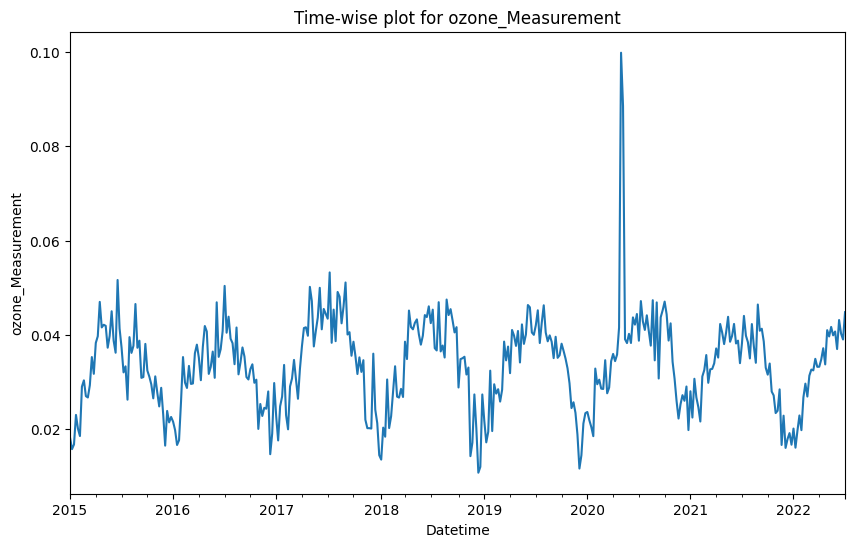

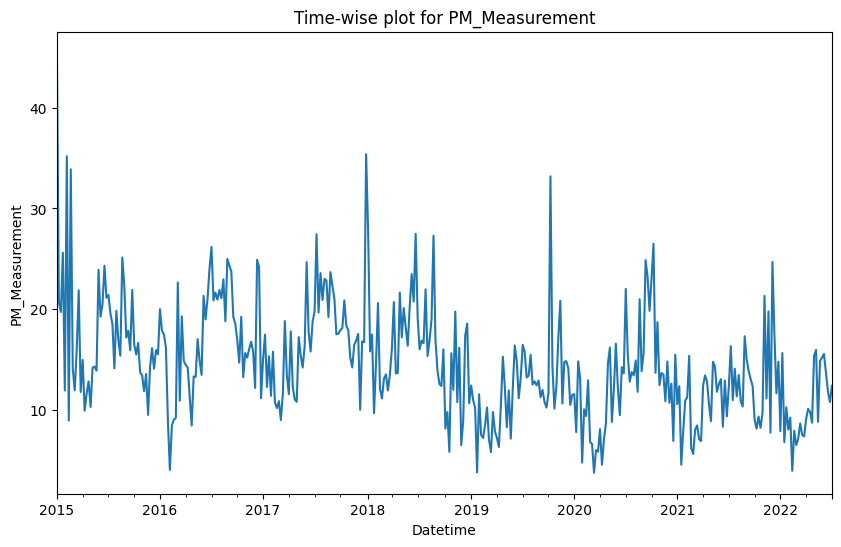

In [ ]:

for column in weekly_df1201.columns:
    if column != 'AQS_Code':
        plt.figure(figsize=(10, 6))
        weekly_df1201[column].plot(title=f'Time-wise plot for {column}',linestyle='-')
        plt.xlabel('Datetime')
        plt.ylabel(column)
        plt.show()

In [ ]:
# Saving
df1103_clean.to_csv('df1103_clean.csv')
df1201_clean.to_csv('df1201_clean.csv')


In [ ]:
df_1103 = pd.read_csv('df1103_clean.csv')
df_1201 = pd.read_csv('df1201_clean.csv')
df_1103.head()

,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
0,2015-01-01 08:00:00,1103,32.9,0.9775,0.5,49.0,43.25,0.007,46.0
1,2015-01-01 09:00:00,1103,32.2,0.8810,0.0,55.0,43.25,0.007,59.0
2,2015-01-01 10:00:00,1103,30.7,0.8810,0.3,56.0,43.25,0.006,66.0
3,2015-01-01 11:00:00,1103,31.5,0.4940,0.0,47.0,43.25,0.008,54.0
4,2015-01-01 12:00:00,1103,30.6,0.3105,0.1,40.0,43.25,0.006,50.0


# Scaling

In [ ]:
import pandas as pd
df1103 = pd.read_csv('df1103_clean.csv')
df1201 = pd.read_csv('df1201_clean.csv')
df=df1103.add(df1201)
df1103.drop(columns=['AQS_Code'], inplace=True)
df1201.drop(columns=['AQS_Code'], inplace=True)

df1103['datetime'] = pd.to_datetime(df1103['datetime'])
df1201['datetime'] = pd.to_datetime(df1201['datetime'])
# df1103.set_index('datetime', inplace=True)
# df1201.set_index('datetime', inplace=True)

# OR

# df1103=df1103_clean
# df1201=df1201_clean

In [ ]:
# Define train-test split (80-20)
split_idx = int(len(df) * 0.8)
df1103_train = df1103.iloc[:split_idx].copy()
df1103_test = df1103.iloc[split_idx:].copy()

df1201_train = df1201.iloc[:split_idx].copy()
df1201_test = df1201.iloc[split_idx:].copy()


In [ ]:
df1103_train = df1103_train.reset_index().rename(columns={'datetime': 'ds', 'PM_Measurement': 'y'})
df1201_train = df1201_train.reset_index().rename(columns={'datetime': 'ds', 'PM_Measurement': 'y'})
df1103_test = df1103_test.reset_index().rename(columns={'datetime': 'ds', 'PM_Measurement': 'y'})
df1201_test = df1201_test.reset_index().rename(columns={'datetime': 'ds', 'PM_Measurement': 'y'})

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

def scale_data(train_df, test_df, columns_to_scale, scaler_filename):
    scaler = StandardScaler()
    scaler.fit(train_df[columns_to_scale])
    train_scaled = scaler.transform(train_df[columns_to_scale])
    test_scaled = scaler.transform(test_df[columns_to_scale])
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns_to_scale, index=train_df.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns_to_scale, index=test_df.index)
    train_remaining = train_df.drop(columns=columns_to_scale)
    test_remaining = test_df.drop(columns=columns_to_scale)
    train_final = pd.concat([train_scaled_df, train_remaining], axis=1)
    test_final = pd.concat([test_scaled_df, test_remaining], axis=1)
    joblib.dump(scaler, scaler_filename)

    return train_final, test_final


In [ ]:
columns_to_scale = ['NO2_Measurement', 'CO_Measurement', 'SO2_Measurement','RH_Measurement', 'Temp_Measurement', 'ozone_Measurement']

scaled_df1103_train, scaled_df1103_test = scale_data(df1103_train, df1103_test, columns_to_scale, 'scaler_df1103.pkl')

scaled_df1201_train, scaled_df1201_test = scale_data(df1201_train, df1201_test, columns_to_scale, 'scaler_df1201.pkl')


In [ ]:
df1103_train=scaled_df1103_train
df1103_test=scaled_df1103_test
df1201_train=scaled_df1201_train
df1201_test=scaled_df1201_test


# Prophet BS

https://freedium.cfd/https://pub.towardsai.net/trend-modeling-in-time-series-forecasting-with-facebook-prophet-3cd9a86be0dd

In [ ]:
# df1103_train['y']=np.log1p(df1103_train['y'])

# # Define the columns to use as regressors
regressors = ['NO2_Measurement', 'CO_Measurement', 'SO2_Measurement',
              'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement']
from prophet import Prophet
model_1103 = Prophet(
    daily_seasonality=False,
    yearly_seasonality=True,
    changepoint_prior_scale=0.05,
    changepoint_range=0.95,
    seasonality_mode='additive'
)

model_1103.add_seasonality(name='hourly', period=24, fourier_order=8)

for reg in regressors:
    model_1103.add_regressor(reg)

model_1103.fit(df1103_train)
df1103_pred=model_1103.predict(df1103_test[['ds'] + regressors].copy())

DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8gifxa7/gkw8ul8i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8gifxa7/b070fvvh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15287', 'data', 'file=/tmp/tmpa8gifxa7/gkw8ul8i.json', 'init=/tmp/tmpa8gifxa7/b070fvvh.json', 'output', 'file=/tmp/tmpa8gifxa7/prophet_modelmy543yyh/prophet_model-20250412031430.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:14:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:15:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
import numpy as np

# Ensure the relevant columns are numeric (in case they are not)
y_true = df1103_test['y'].values
y_pred = df1103_pred['yhat'].values

#For Transformation of Y
# y_true = np.expm1(df1103_test['y'])
# y_pred= np.expm1(df1103_pred['yhat'])

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate R-squared (R²)
r2 = r2_score(y_true, y_pred)

# Calculate MAPE
mape = mean_absolute_percentage_error(y_true, y_pred)

# Calculate Explained Variance Score
evs = explained_variance_score(y_true, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"Explained Variance Score: {evs}")


Mean Absolute Error (MAE): 12.97218082760905
Mean Squared Error (MSE): 247.07499647284337
Root Mean Squared Error (RMSE): 15.718619420064963
R-squared (R²): -2.100428942947652
Mean Absolute Percentage Error (MAPE): 26153182435974.793
Explained Variance Score: 0.006983427376628715


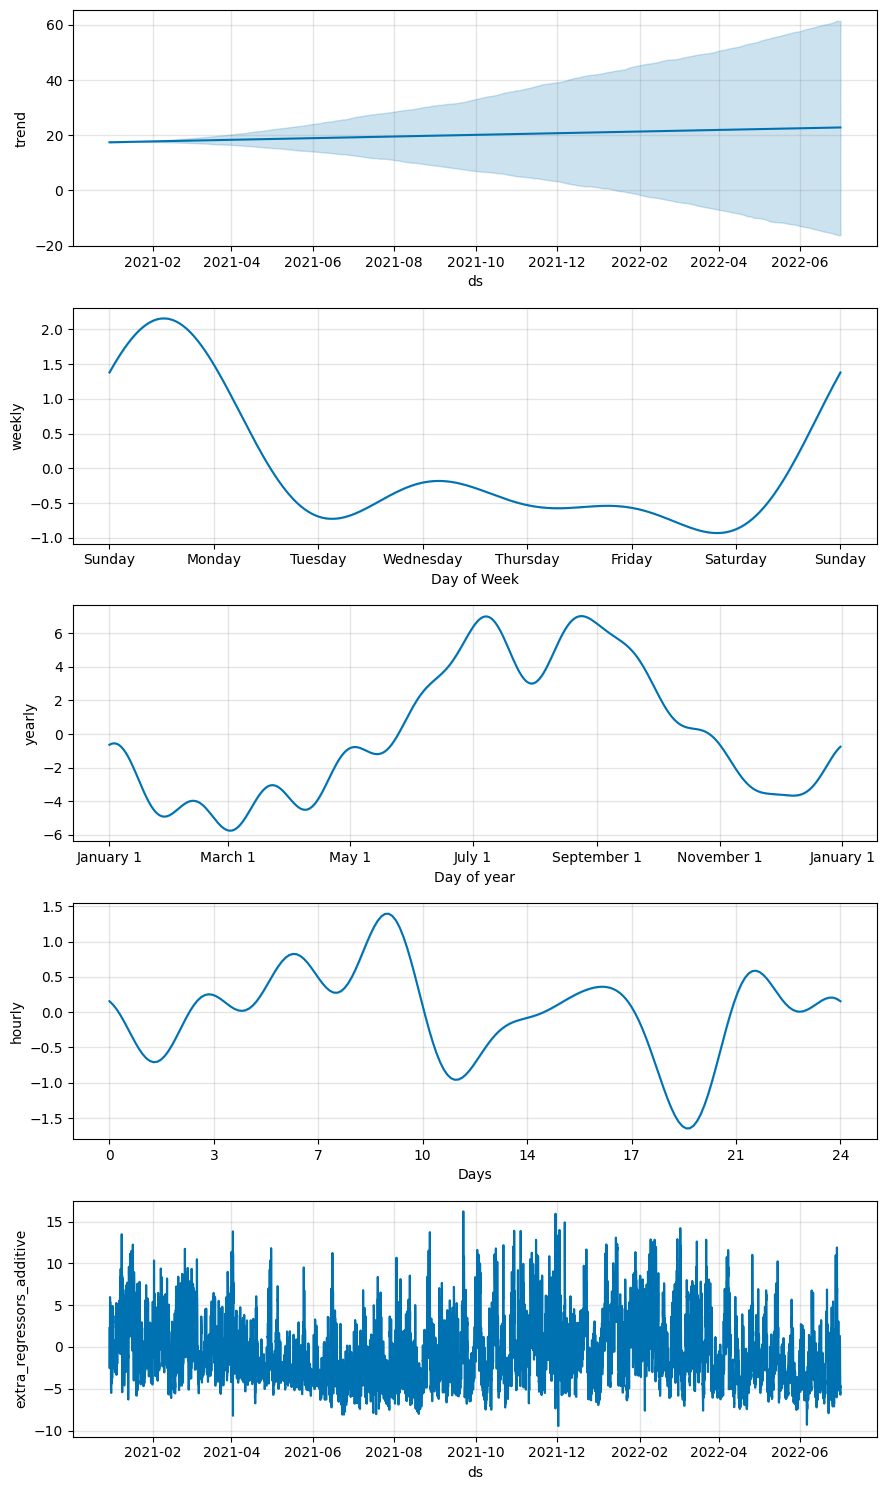

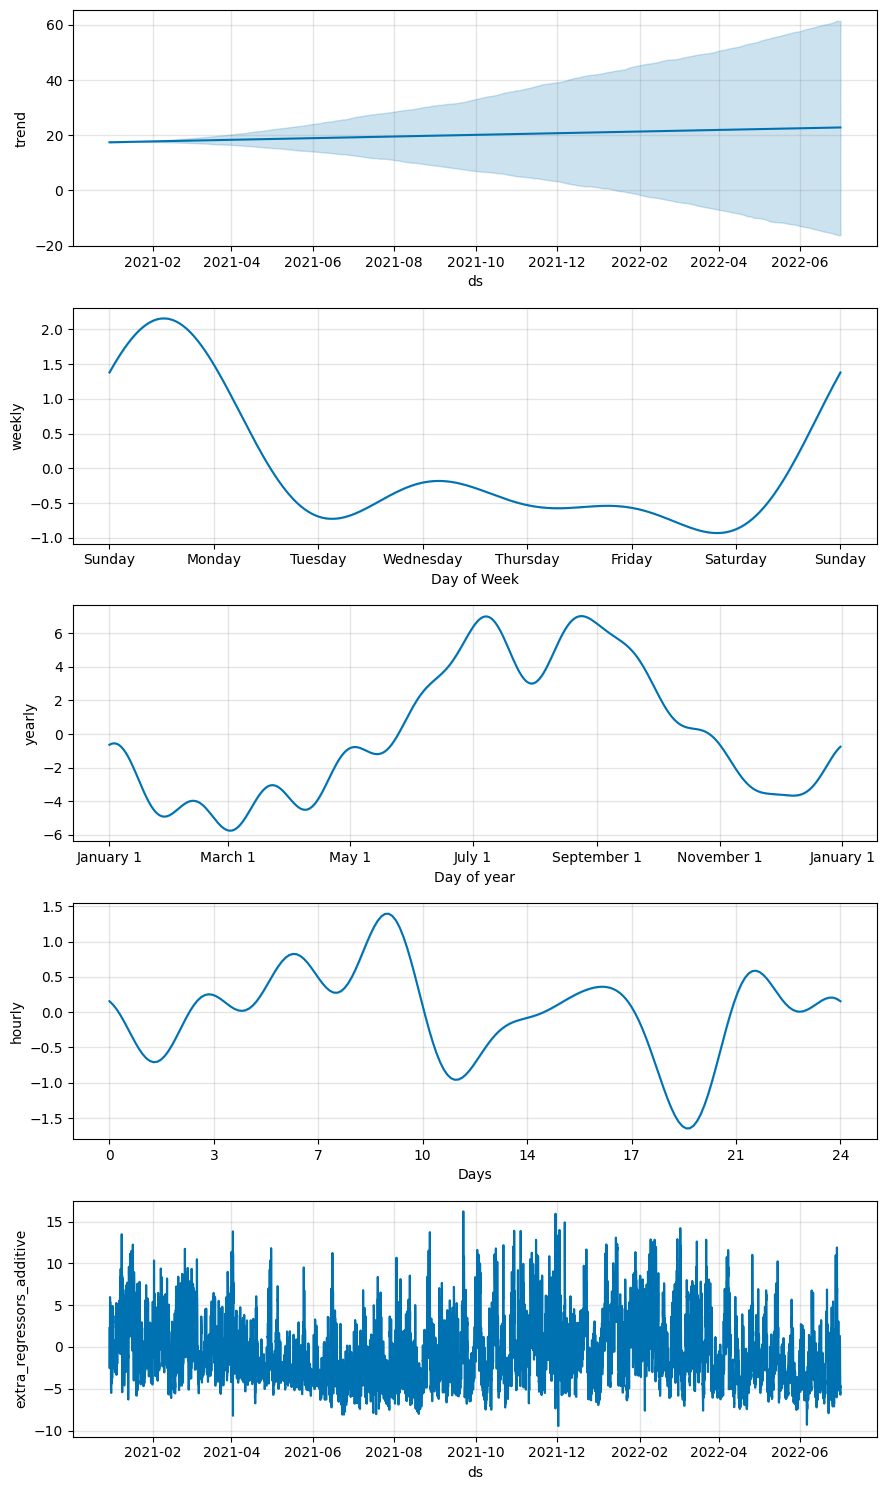

In [ ]:
model_1103.plot_components(df1103_pred)

# XGBoost BS

In [ ]:
import pandas as pd
import numpy as np
import joblib
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ensure datetime is correctly formatted
df1103_train['ds'] = pd.to_datetime(df1103_train['ds'])
df1103_test['ds'] = pd.to_datetime(df1103_test['ds'])

def add_seasonal_features(df):

    df['week_of_year'] = df['ds'].dt.isocalendar().week
    df['day_of_year'] = df['ds'].dt.dayofyear
    df['hour'] = df['ds'].dt.hour
    df['day'] = df['ds'].dt.day
    df['month'] = df['ds'].dt.month

    # Map the month to a season
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['season'] = df['month'].apply(get_season)

    # Cyclic encoding for month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # Cyclic encoding for hour
    df['hour_sin'] = np.sin(2 * np.pi * df['ds'].dt.hour / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['ds'].dt.hour / 24)

    # Weekday vs Weekend feature
    df['is_weekend'] = df['ds'].dt.weekday >= 5

    return df

In [ ]:
# df1103_train = add_seasonal_features(df1103_train)
# df1103_test = add_seasonal_features(df1103_test)

df1103_train = add_seasonal_features(df1201_train) # For 1201
df1103_test = add_seasonal_features(df1201_test)
regressors = [
    'NO2_Measurement', 'CO_Measurement', 'SO2_Measurement',
    'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement'
    ,'hour', 'day', 'month',  # Original features
    'month_sin', 'month_cos',  # Seasonal features for month
    'hour_sin', 'hour_cos',  # Cyclic features for hour
    'is_weekend',  # Weekday vs weekend feature
    'week_of_year', 'day_of_year',  # Additional seasonal time-based features
]

X_train = df1103_train[regressors]
y_train = df1103_train['y']
y_train = np.log1p(y_train) #Log Transformation PART
X_test = df1103_test[regressors]
y_test = df1103_test['y']


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid
param_grid = {
    'n_estimators': [300,400,500],
    'max_depth': [7,9,11],
    'learning_rate': [0.005,0.01,0.05],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0]
}
# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}


In [ ]:
# Train XGBoost Model
import xgboost as xgb
# best_params = {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500}
xgb_model = XGBRegressor(**best_params, objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predict
y_pred = xgb_model.predict(X_test)

y_pred = np.expm1(y_pred)    # Predictions back to original scale (log1)

Mean Absolute Error (MAE): 5.253144017458053
Mean Squared Error (MSE): 53.40075607004249
Root Mean Squared Error (RMSE): 7.307582094649535
R-squared (R²): 0.16008754310737572
Mean Absolute Percentage Error (MAPE): inf


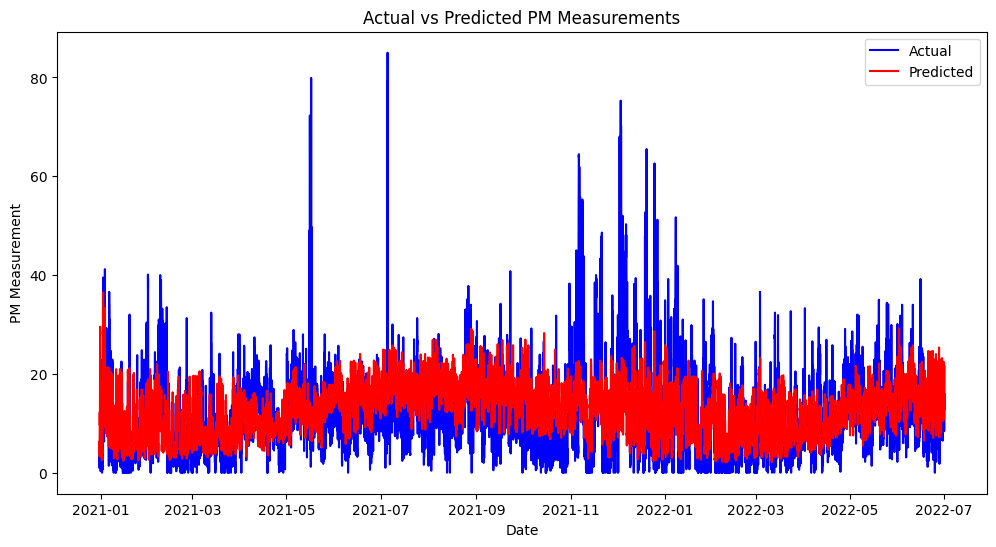

In [ ]:

# Calculate Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

# Plot Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1103_test['ds'], y_test, label="Actual", color='blue')
plt.plot(df1103_test['ds'], y_pred, label="Predicted", color='red')
plt.xlabel("Date")
plt.ylabel("PM Measurement")
plt.legend()
plt.title("Actual vs Predicted PM Measurements")
plt.show()


# Xgboost # best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.005, 'max_depth': 9, 'n_estimators': 500, 'subsample': 0.8} with slop
# Mean Absolute Error (MAE): 5.639830160064802
# Mean Squared Error (MSE): 69.2075300728758
# Root Mean Squared Error (RMSE): 8.319106326575938
# R-squared (R²): 0.13154697006563176
# Mean Absolute Percentage Error (MAPE): inf


# Xgboost # best_params = {'learning_rate': 0.005, 'max_depth': 7, 'n_estimators': 500} without slop
# Mean Absolute Error (MAE): 6.2246267919679
# Mean Squared Error (MSE): 82.1570199792401
# Root Mean Squared Error (RMSE): 9.064050969585294
# R-squared (R²): -0.030950141642364315
# Mean Absolute Percentage Error (MAPE): inf

# Xgboost # best_params = {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 300} with slop
# Mean Absolute Error (MAE): 5.758647293091401
# Mean Squared Error (MSE): 72.89305703058412
# Root Mean Squared Error (RMSE): 8.537743087642314
# R-squared (R²): 0.08529901048729938
# Mean Absolute Percentage Error (MAPE): inf

# Xgboost # best_params =  {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 400} with slop and log transformation on y
# Mean Absolute Error (MAE): 5.133584331063876
# Mean Squared Error (MSE): 69.66007088821246
# Root Mean Squared Error (RMSE): 8.346260892652017
# R-squared (R²): 0.12586824635111327
# Mean Absolute Percentage Error (MAPE): inf

#Prophet with log transformation on Y
# Mean Absolute Error (MAE): 1.0920412092645742e+127
# Mean Squared Error (MSE): 1.5673737234137707e+258
# Root Mean Squared Error (RMSE): 1.2519479715282782e+129
# R-squared (R²): -7.609191915358693e-05
# Mean Absolute Percentage Error (MAPE): 44035373894872.71
# Explained Variance Score: 0.0



In [ ]:
import pickle
pickle.dump(xgb_model, open("xgb_1201.pkl", "wb"))


 # SARIMA


In [ ]:
df1103_train.describe()

,index,ds,Unnamed: 0,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,y
count,52569.000000,52569,52569.000000,52569.000000,52569.000000,52569.000000,52569.000000,52569.000000,52569.000000,52569.000000
mean,26284.000000,2017-12-31 12:00:00,52568.000000,19.238573,0.393534,0.081894,61.073514,65.712291,0.024316,15.513934
min,0.000000,2015-01-01 08:00:00,0.000000,0.200000,0.000000,0.000000,1.000000,43.250000,0.000000,0.000000
25%,13142.000000,2016-07-01 22:00:00,26284.000000,9.200000,0.208500,0.000000,46.000000,58.900000,0.007000,9.000000
50%,26284.000000,2017-12-31 12:00:00,52568.000000,16.500000,0.312000,0.000000,63.000000,65.200000,0.024000,14.000000
75%,39426.000000,2019-07-02 02:00:00,78852.000000,27.600000,0.500000,0.100000,79.000000,72.100000,0.037000,19.000000
max,52568.000000,2020-12-30 16:00:00,105136.000000,54.956250,0.977500,0.500000,100.000000,86.850000,0.084500,541.000000
std,15175.507487,NaN,30351.014975,12.057705,0.223158,0.147663,21.992724,9.369512,0.018340,11.285219


In [ ]:
df1103_test.describe()

,index,ds,Unnamed: 0,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,y
count,13143.000000,13143,13143.000000,13143.000000,13143.000000,13143.000000,13143.000000,13143.000000,13143.000000,13143.000000
mean,59140.000000,2021-09-30 11:59:59.999999744,118280.000000,17.235251,0.339594,0.091653,37.505212,65.153770,0.026704,13.985430
min,52569.000000,2020-12-30 17:00:00,105138.000000,0.800000,0.000000,0.000000,1.000000,43.500000,0.000000,0.000000
25%,55854.500000,2021-05-16 14:30:00,111709.000000,7.500000,0.200000,0.000000,18.000000,67.000000,0.009000,8.700000
50%,59140.000000,2021-09-30 12:00:00,118280.000000,13.950000,0.300000,0.000000,19.000000,67.000000,0.028000,13.000000
75%,62425.500000,2022-02-14 09:30:00,124851.000000,25.550000,0.400000,0.100000,57.000000,67.000000,0.041000,18.000000
max,65711.000000,2022-07-01 07:00:00,131422.000000,54.950000,0.900000,0.500000,100.000000,86.000000,0.084000,302.000000
std,3794.201629,NaN,7588.403258,11.577141,0.197502,0.151750,25.954875,5.556709,0.018505,8.927298


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define regressors
regressors = ['NO2_Measurement', 'CO_Measurement', 'SO2_Measurement',
              'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement']

# Target variable
y_train = df1103_train['y']
X_train = df1103_train[regressors]

y_test = df1103_test['y']
X_test = df1103_test[regressors]

# Build and fit SARIMAX model
model = SARIMAX(y_train, exog=X_train, order=(1,1,1), seasonal_order=(1,0,1,24))
model_fit = model.fit(disp=False)

# Forecast using test regressors
y_pred = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 22.569325268188987
MSE: 614.6211834619871
RMSE: 24.79155468021292
R²: -6.712594691319693


In [ ]:
y_pred.describe()

,predicted_mean
count,13143.000000
mean,-8.562408
std,5.523933
min,-15.967007
25%,-12.428581
50%,-9.820167
75%,-6.823382
max,12.205269


# Inference

In [2]:
import pickle
import pandas as pd
import numpy as np

model=pickle.load(open('xgb_1103.pkl', 'rb'))

df1103=pd.read_csv('df1103_clean.csv')
df1201=pd.read_csv('df1201_clean.csv')

In [3]:
def add_seasonal_features(df):

    df['week_of_year'] = df['ds'].dt.isocalendar().week
    df['day_of_year'] = df['ds'].dt.dayofyear
    df['hour'] = df['ds'].dt.hour
    df['day'] = df['ds'].dt.day
    df['month'] = df['ds'].dt.month

    # Map the month to a season
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['season'] = df['month'].apply(get_season)

    # Cyclic encoding for month
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

    # Cyclic encoding for hour
    df['hour_sin'] = np.sin(2 * np.pi * df['ds'].dt.hour / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['ds'].dt.hour / 24)

    # Weekday vs Weekend feature
    df['is_weekend'] = df['ds'].dt.weekday >= 5

    return df

In [7]:
def predict_pm25(model, data_point):
    df = pd.DataFrame([data_point])
    df['ds'] = pd.to_datetime(df['ds'])
    df = add_seasonal_features(df)

    # Ensure feature order matches training
    feature_cols = [
        'NO2_Measurement', 'CO_Measurement', 'SO2_Measurement',
        'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement',
        'hour', 'day', 'month',  # <-- These came first
        'month_sin', 'month_cos', 'hour_sin', 'hour_cos',
        'is_weekend', 'week_of_year', 'day_of_year'
    ]

    X = df[feature_cols]

    # Predict log value, then inverse transform
    y_pred_log = model.predict(X)
    y_pred = np.expm1(y_pred_log)

    return y_pred[0]


In [15]:
# Example input
data_point = {
    'ds': '2025-05-11 15:00:00',
    'NO2_Measurement': 30,
    'CO_Measurement': 0.5,
    'SO2_Measurement': 3,
    'RH_Measurement': 70,
    'Temp_Measurement': 29,
    'ozone_Measurement': 22
}

predicted_pm25 = predict_pm25(model, data_point)
print(f"Predicted PM2.5: {predicted_pm25:.2f}")


Predicted PM2.5: 25.37


In [18]:

def estimate_features(df, target_time, n_years=5):
    sensor_columns = [
    'NO2_Measurement', 'CO_Measurement', 'SO2_Measurement',
    'RH_Measurement', 'Temp_Measurement', 'ozone_Measurement']
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['hour'] = df['datetime'].dt.hour
    target_year = target_time.year
    target_month = target_time.month
    target_day = target_time.day
    target_hour = target_time.hour

    # Filter for matching timestamps in the last `n_years`
    past_years = [target_year - i for i in range(1, n_years + 1)]
    subset = df[
        (df['year'].isin(past_years)) &
        (df['month'] == target_month) &
        (df['day'] == target_day) &
        (df['hour'] == target_hour)
    ]

    return subset[sensor_columns].mean().to_dict()


target_time = pd.Timestamp("2025-04-04 14:00")
estimated_features = estimate_features(df1103, target_time, n_years=5)


print(estimated_features)


{'NO2_Measurement': 17.383333333333336, 'CO_Measurement': 0.2333333333333333, 'SO2_Measurement': 0.0, 'RH_Measurement': 26.144444444444446, 'Temp_Measurement': 59.0, 'ozone_Measurement': 0.016666666666666666}


In [19]:
# Example input
data_point = {
    'ds': '2025-05-11 15:00:00'
}
data_point.update(estimate_features(df1201, target_time, n_years=5))
predicted_pm25 = predict_pm25(model, data_point)
print(f"Predicted PM2.5: {predicted_pm25:.2f}")


Predicted PM2.5: 21.81
